In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import multibind as mb
import numpy as np
import pandas as pd
import torch
import bindome as bd
bd.constants.ANNOTATIONS_DIRECTORY = 'annotations'
# mb.models.MultiBind
import torch.optim as topti
import torch.utils.data as tdata
import matplotlib.pyplot as plt
import logomaker
import copy

# Use a GPU if available, as it should be faster.
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Using device: " + str(device))

/Users/egeerdogan/mambaforge/envs/multibind/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Using device: cpu


In [3]:
n_rounds = 1
data = pd.read_csv('../data/countTable.0.CTCF_r3.tsv.gz', sep='\t', header=None)
data.columns = ['seq'] + [i for i in range(n_rounds+1)]
# data = data.sample(n=1000)
# data.index = range(len(data))
dataset = mb.datasets.SelexDataset(data, n_rounds=n_rounds)
train = tdata.DataLoader(dataset=dataset, batch_size=256, shuffle=True)
train_test = tdata.DataLoader(dataset=dataset, batch_size=1, shuffle=False)

TypeError: can only concatenate str (not "int") to str

In [7]:
model = mb.models.DinucSelex(use_dinuc=False, kernels=[0, 14, 12], n_rounds=1, n_batches=1).to(device)
l2 = []
optimiser = topti.Adam(model.parameters(), lr=0.001, weight_decay=0.0001)
# optimiser = topti.LBFGS(model.parameters())
criterion = mb.tl.PoissonLoss()

In [10]:
model1 = copy.deepcopy(model)
optimiser1 = topti.Adam(model1.parameters(), lr=0.001, weight_decay=0.0001)

In [11]:
mb.tl.train_network(model1, train, device, optimiser1, criterion, dirichlet_regularization=0, num_epochs=500, early_stopping=10, log_each=10)

optimizing using <class 'torch.optim.adam.Adam'>
Epoch:  1, Loss: 1.2263 , best epoch: -1 secs per epoch: 4.762 s
Epoch: 11, Loss: 0.8413 , best epoch: 9 secs per epoch: 5.346 s
Epoch: 21, Loss: 0.8290 , best epoch: 19 secs per epoch: 5.182 s
Epoch: 31, Loss: 0.8286 , best epoch: 29 secs per epoch: 4.894 s
Epoch: 41, Loss: 0.8286 , best epoch: 36 secs per epoch: 4.878 s
Epoch: 51, Loss: 0.8285 , best epoch: 46 secs per epoch: 4.803 s
Epoch: 61, Loss: 0.8284 , best epoch: 59 secs per epoch: 4.765 s
Epoch: 71, Loss: 0.8283 , best epoch: 68 secs per epoch: 4.760 s
Epoch: 81, Loss: 0.8282 , best epoch: 76 secs per epoch: 4.709 s
Epoch: 91, Loss: 0.8281 , best epoch: 87 secs per epoch: 4.688 s
Epoch: 101, Loss: 0.8281 , best epoch: 98 secs per epoch: 4.708 s
Epoch: 111, Loss: 0.8280 , best epoch: 108 secs per epoch: 4.733 s
Epoch: 121, Loss: 0.8277 , best epoch: 117 secs per epoch: 4.758 s
Epoch: 131, Loss: 0.8274 , best epoch: 129 secs per epoch: 4.782 s
Epoch: 141, Loss: 0.8273 , best epo

log_etas
Parameter containing:
tensor([[ 1.2389, -1.2389]], requires_grad=True)
activities
[[[0.9999997  0.9135477 ]
  [1.000006   0.29699433]
  [0.99999905 0.5390072 ]]]


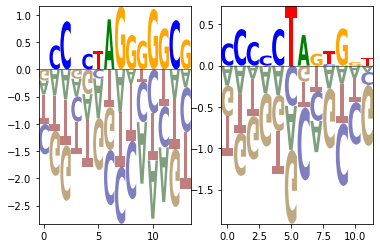

In [12]:
mb.pl.conv_mono(model1)

In [16]:
model2 = copy.deepcopy(model)
optimiser2 = topti.Adam(model2.parameters(), lr=0.001, weight_decay=0.0001)

In [17]:
mb.tl.train_network(model2, train, device, optimiser2, criterion, dirichlet_regularization=0.002, num_epochs=500, early_stopping=10, log_each=10)

optimizing using <class 'torch.optim.adam.Adam'>
Epoch:  1, Loss: 1.5102 , best epoch: -1 secs per epoch: 5.163 s
Epoch: 11, Loss: 1.1310 , best epoch: 9 secs per epoch: 5.446 s
Epoch: 21, Loss: 1.1308 , best epoch: 18 secs per epoch: 5.114 s
Epoch: 31, Loss: 1.1303 , best epoch: 29 secs per epoch: 4.997 s
Epoch: 41, Loss: 1.1293 , best epoch: 39 secs per epoch: 5.008 s
Epoch: 51, Loss: 1.1280 , best epoch: 47 secs per epoch: 5.004 s
Epoch: 61, Loss: 1.1281 , best epoch: 57 secs per epoch: 5.009 s
Epoch: 71, Loss: 1.1280 , best epoch: 68 secs per epoch: 4.996 s
Epoch: 79, Loss: 1.1281 , best epoch: 68 secs per epoch: 4.947 s
early stop!


log_etas
Parameter containing:
tensor([[ 1.0301, -1.0301]], requires_grad=True)
activities
[[[0.9999996  0.25532478]
  [0.99998575 0.6969696 ]
  [0.9999996  0.24815018]]]


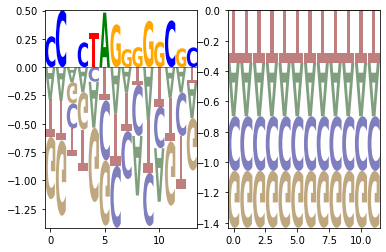

In [18]:
mb.pl.conv_mono(model2)

In [19]:
model3 = copy.deepcopy(model)
optimiser3 = topti.Adam(model3.parameters(), lr=0.001, weight_decay=0.0001)

In [20]:
mb.tl.train_network(model3, train, device, optimiser3, criterion, dirichlet_regularization=0.0002, num_epochs=500, early_stopping=10, log_each=10)

optimizing using <class 'torch.optim.adam.Adam'>
Epoch:  1, Loss: 1.2519 , best epoch: -1 secs per epoch: 4.883 s
Epoch: 11, Loss: 0.8705 , best epoch: 9 secs per epoch: 5.257 s
Epoch: 21, Loss: 0.8601 , best epoch: 19 secs per epoch: 5.079 s
Epoch: 31, Loss: 0.8598 , best epoch: 28 secs per epoch: 4.953 s
Epoch: 41, Loss: 0.8598 , best epoch: 33 secs per epoch: 4.960 s
Epoch: 44, Loss: 0.8599 , best epoch: 33 secs per epoch: 4.946 s
early stop!


log_etas
Parameter containing:
tensor([[ 0.7538, -0.7538]], requires_grad=True)
activities
[[[1.0000118  0.34085923]
  [1.0000343  0.5886295 ]
  [1.0000193  0.5799572 ]]]


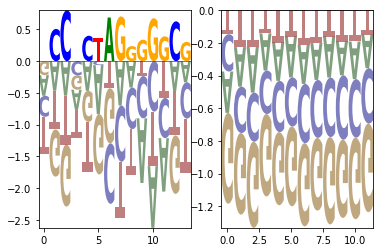

In [21]:
mb.pl.conv_mono(model3)